In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

# load image
image = mpimg.imread("exit-ramp.jpg")

# convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# define gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# run Canny edge detection
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [41]:
# define Hough transform parameters
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [45]:
# create image with detected lines
line_image = np.copy(edges)*0
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

In [46]:
# create a color binary image 
color_edges = np.dstack((edges, edges, edges))

In [52]:
# draw the lines on the edge image
combo = cv2.addWeighted(edges, 0.8, line_image, 1, 0)

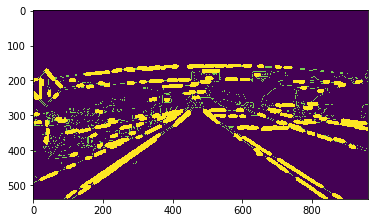

In [53]:
plt.imshow(combo)

### Quiz

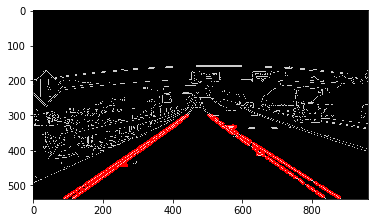

In [71]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
ysize, xsize, _ = imshape
point_a = (0,ysize)
point_b = (xsize/2 - 40, ysize/2+30)
point_c = (xsize/2 + 40, ysize/2+30)
point_d = (xsize, ysize)
vertices = np.array([[point_a, point_b, point_c, point_d]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 1     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 5 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)



In [57]:
ysize, xsize, _ = imshape

In [60]:
xsize/2 -40

440